In [2]:
from matplotlib import pyplot as plt
import numpy as np


### 0316单源迁移的计算效果可视化

In [2]:
data = np.zeros([21,21,3])
for i in range(21):
    data[i] = np.loadtxt('/home/viki/Codes/MultiSource/3/formula_test/results/single_acc_table_0316_alpha=0.4_t='+str(i)+'.npy')

FileNotFoundError: /home/viki/Codes/MultiSource/3/formula_test/results/single_acc_table_0316_alpha=0.4_t=0.npy not found.

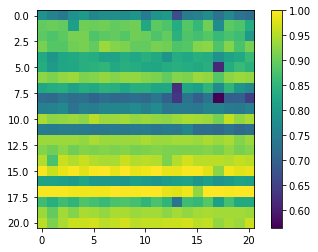

In [35]:
plt.imshow(data[:,:,2])
plt.colorbar()

In [36]:
data[:,:,2] -= data[:,:,2].mean(1)

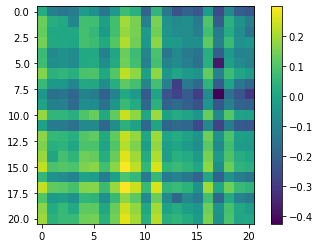

In [38]:
plt.imshow(data[:,:,2])
plt.colorbar()

In [23]:
# 使用训练所得的g做normalize
data1=data
data1[:,:,2] = data[:,:,2]-data[:,:,1]

array([[ 0.005, -0.02 , -0.04 ,  0.005,  0.02 , -0.015,  0.   ,  0.   ,
        -0.005,  0.01 , -0.035,  0.01 ,  0.02 , -0.11 , -0.03 , -0.025,
         0.   , -0.05 , -0.01 , -0.05 , -0.06 ],
       [ 0.015,  0.02 ,  0.015, -0.07 ,  0.025,  0.02 ,  0.025,  0.015,
         0.02 ,  0.025, -0.055,  0.01 ,  0.   , -0.045,  0.005, -0.025,
         0.025, -0.105,  0.01 ,  0.   , -0.045],
       [ 0.015,  0.005,  0.015,  0.035,  0.035,  0.005,  0.015,  0.02 ,
         0.01 ,  0.03 ,  0.025,  0.005,  0.02 , -0.03 ,  0.005, -0.005,
         0.01 , -0.015,  0.   , -0.01 , -0.075],
       [ 0.   , -0.025, -0.025, -0.005,  0.   , -0.015,  0.025,  0.01 ,
         0.005, -0.015, -0.015,  0.   , -0.005, -0.03 , -0.025,  0.01 ,
         0.015, -0.03 ,  0.01 , -0.035,  0.   ],
       [-0.005, -0.04 , -0.015, -0.005,  0.005,  0.   , -0.02 , -0.02 ,
         0.   , -0.01 ,  0.005, -0.005, -0.045,  0.   , -0.01 ,  0.005,
         0.   , -0.05 , -0.02 , -0.005,  0.025],
       [ 0.   , -0.03 , -0.015, -0.

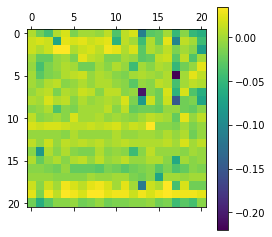

In [17]:
plt.matshow(data1[:,:,2])
plt.colorbar()

似乎看不出明显规律

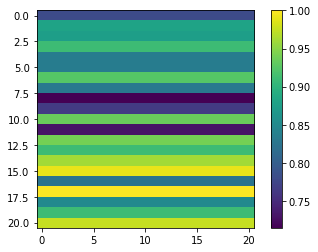

In [41]:
plt.imshow(data[:,:,1])
plt.colorbar()

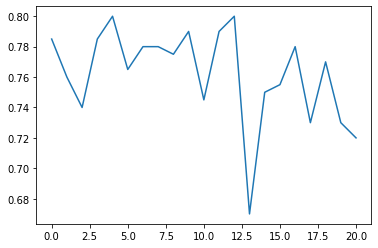

In [8]:
plt.plot(data[0,:,2])

### 0319 修改baseline

In [5]:
data = np.zeros([21,21,3])
for i in range(21):
    data[i] = np.loadtxt('/home/viki/Codes/MultiSource/3/multi_source_exp/MultiSourceExp/formula_test/results/single_acc_table_0320_alpha=0.4_t='+str(i)+'.npy')

FileNotFoundError: /home/viki/Codes/MultiSource/3/multi_source_exp/MultiSourceExp/formula_test/results/single_acc_table_0320_alpha=0.4_t=0.npy not found.

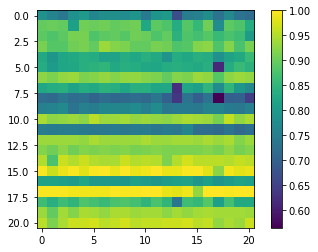

In [30]:
plt.imshow(data[:,:,2])
plt.colorbar()

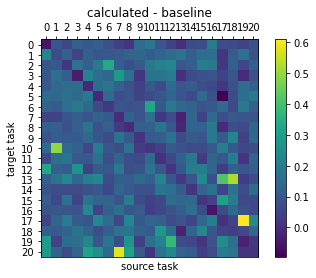

In [45]:
plt.imshow(data[:,:,2]-data[:,:,1])
plt.colorbar()
plt.title('calculated - baseline')
plt.xlabel('source task')
plt.ylabel('target task')
plt.xticks(np.arange(21))
plt.yticks(np.arange(21))
plt.gca().xaxis.set_ticks_position('top')
plt.show()

In [9]:
task_list =  [1,2,3]
task_list = list(range(21)) if task_list == None else task_list

In [10]:
task_list

[1, 2, 3]

In [29]:
res_path = "/home/viki/Codes/MultiSource/3/multi_source_exp/MultiSourceExp/fg_train/results/"

data = []

for i in range(21):

    data.append(np.load(f"{res_path}fixed_f_transfer_accuracy_dict_source={i}__0414.npy", allow_pickle=True).item()[0])

    
    

In [59]:
data_1 = []
for i in range(21):

    data_1.append(np.load(f"{res_path}fixed_f_transfer_accuracy_dict_source={i}__0412.npy", allow_pickle=True).item()[0])

    
    

In [47]:
data[0]

{'g_rand': 0.5,
 'g_cal': 0.82,
 'otce': array([[8.95690918e-05, 0.00000000e+00]]),
 'finetune': [0.85]}

In [34]:
g_rand, g_cal, W, ce, finetune = [], [], [], [], []
for d in data:
    g_rand.append(d['g_rand'])
    g_cal.append(d['g_cal'])
    W.append(d['otce'][0][0])
    ce.append(d['otce'][0][1])
    finetune.append(d['finetune'][0])

In [61]:
g_net = []
for d in data_1:
    g_net.append(d['g_net'])

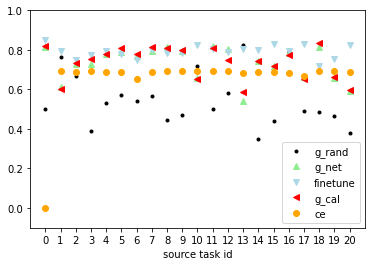

In [85]:
plt.plot(g_rand,'.',color='black')
plt.plot(g_net,'^', color='lightgreen')
plt.plot(finetune, 'v', color='lightblue')
plt.plot(g_cal,'r<')
plt.plot(ce, 'o', color='orange')
plt.xlabel('source task id')
plt.xticks(np.arange(21))
plt.ylim(-0.1,1)
plt.legend(['g_rand','g_net','finetune','g_cal','ce'])
plt.show()


In [89]:
np.load('/home/viki/Codes/MultiSource/3/multi_source_exp/MultiSourceExp/fg_train/results/fixed_f_multi_accuracy_dict_source=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]__0419.npy', allow_pickle=True).item()[0]

{'g_rand': 0.51,
 'g_cal': 0.8,
 'otce': array([[287.09203461,   0.69134538],
        [330.40927979,   0.68812057],
        [227.42135864,   0.69314718],
        [273.69775646,   0.68582303],
        [222.84491562,   0.68808779],
        [229.39227753,   0.65341819],
        [219.56401138,   0.6859298 ],
        [232.96103378,   0.69314718],
        [231.47452652,   0.69234181],
        [238.63475777,   0.69314718],
        [209.79154968,   0.69133957],
        [235.68004639,   0.69132785],
        [244.18020252,   0.68297986],
        [198.1951255 ,   0.68796961],
        [243.28755844,   0.68796961],
        [246.08600159,   0.68311495],
        [282.86168701,   0.66865618],
        [177.6339122 ,   0.69232591],
        [208.75413589,   0.69234568],
        [217.44823013,   0.68813679]])}